In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [4]:
data=[]
labels=[]
classes=43
#cur_path=os.getcwd()
cur_path='B:\\Firefox\\traffic_signs\\one\\Traffic-Signs-Recognition-main'

In [5]:
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    images=os.listdir(path)
    
    for a in images:
        try:
            image=Image.open(path+'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading Data")

In [6]:
data=np.array(data)
labels=np.array(labels)
print(data.shape,labels.shape)

(39339, 30, 30, 3) (39339,)


In [7]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

(31471, 30, 30, 3) (7868, 30, 30, 3) (31471,) (7868,)


In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
984/984 [==============================] - 12s 7ms/step - loss: 2.1918 - accuracy: 0.4325 - val_loss: 0.7763 - val_accuracy: 0.8022
Epoch 2/15
984/984 [==============================] - 6s 6ms/step - loss: 1.0669 - accuracy: 0.6726 - val_loss: 0.5132 - val_accuracy: 0.8447
Epoch 3/15
984/984 [==============================] - 6s 6ms/step - loss: 0.8627 - accuracy: 0.7286 - val_loss: 0.4521 - val_accuracy: 0.8590
Epoch 4/15
984/984 [==============================] - 6s 6ms/step - loss: 0.7338 - accuracy: 0.7687 - val_loss: 0.3416 - val_accuracy: 0.8998
Epoch 5/15
984/984 [==============================] - 6s 6ms/step - loss: 0.5713 - accuracy: 0.8202 - val_loss: 0.2220 - val_accuracy: 0.9310
Epoch 6/15
984/984 [==============================] - 6s 6ms/step - loss: 0.4588 - accuracy: 0.8567 - val_loss: 0.1366 - val_accuracy: 0.9582
Epoch 7/15
984/984 [==============================] - 6s 6ms/step - loss: 0.3923 - accuracy: 0.8818 - val_loss: 0.1408 - val_accuracy: 0.9592
Epoch

In [10]:
model.save("my_model.h5")

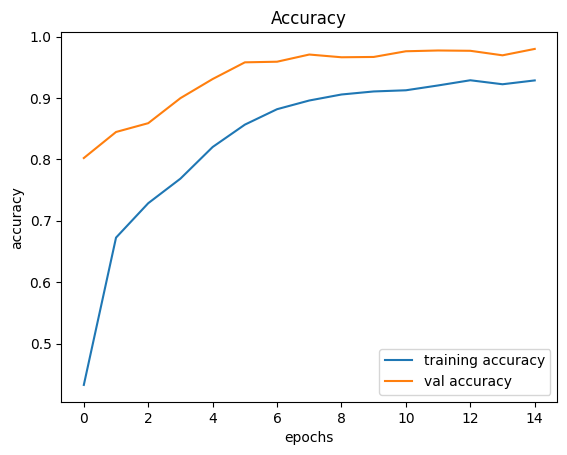

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

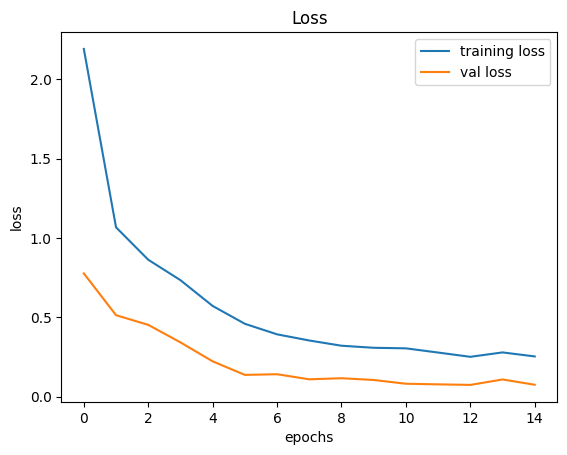

In [12]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
#
#print(cur_path,path)
#print("D:\Project-Traffic Signs Recognition\Test")
path=os.path.join(cur_path,'Test.csv')
y_test = pd.read_csv(path)
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
cur_path+='/'
for img in imgs:
    image = Image.open(cur_path+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(model.predict(X_test),axis=-1)
#pred = model.predict_classes(X_test)

395/395 [==============================] - 1s 3ms/step


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9405384006334125


In [15]:
model.save('traffic_classifier.h5')